In [76]:
import pandas as pd
import polars as pl
import numpy as np
import bottleneck
import matplotlib.pyplot as plt
from riskmatrix.alpha.alpha101_new import compute_alpha101
import xgboost as xgb

In [77]:
# FILTER_SYMBOLS = ['BTCUSDT', 'ETHUSDT', 'SOLUSDT', 'XRPUSDT', 'DOGEUSDT', 'BNBUSDT', 'ADAUSDT', '1000SHIBUSDT', 'MATICUSDT', 'AVAXUSDT', 'ETCUSDT', 'LTCUSDT', 'LINKUSDT', 'DOTUSDT', 'FTMUSDT', '1000PEPEUSDT', 'GMTUSDT', 'BCHUSDT', 'FILUSDT', 'SANDUSDT', 'NEARUSDT', 'EOSUSDT', 'AXSUSDT', 'GALAUSDT', 'APEUSDT', 'ATOMUSDT', 'MANAUSDT', 'APTUSDT', 'OPUSDT', 'TRXUSDT', 'DYDXUSDT', 'ORDIUSDT', 'CHZUSDT', 'TRBUSDT', 'WIFUSDT', 'CRVUSDT', 'ARBUSDT', 'UNIUSDT', 'SUIUSDT', 'WLDUSDT', 'AAVEUSDT', 'WAVESUSDT', 'PEOPLEUSDT', 'SUSHIUSDT', 'MASKUSDT', 'RUNEUSDT', 'XLMUSDT', 'THETAUSDT', 'INJUSDT', 'LRCUSDT', 'CFXUSDT', 'VETUSDT', 'ALGOUSDT', 'ALICEUSDT', 'ZILUSDT', 'SXPUSDT', 'XTZUSDT', 'GRTUSDT', 'LINAUSDT', 'MKRUSDT', 'TIAUSDT', 'STORJUSDT', 'UNFIUSDT', '1000BONKUSDT', 'NOTUSDT', 'ENJUSDT', 'NEOUSDT', 'EGLDUSDT', 'FETUSDT', '1INCHUSDT', '1000LUNCUSDT', 'STXUSDT', 'COMPUSDT', 'YFIUSDT', 'ONEUSDT', 'KNCUSDT', 'LDOUSDT', '1000SATSUSDT', 'SNXUSDT', 'ZECUSDT', 'ENSUSDT', 'OMGUSDT', 'BOMEUSDT', 'SEIUSDT', 'MTLUSDT', 'BLZUSDT', 'REEFUSDT', 'CHRUSDT', 'BAKEUSDT', 'KAVAUSDT', '1000FLOKIUSDT', 'ENAUSDT', 'RSRUSDT', 'XMRUSDT', 'RNDRUSDT', 'RLCUSDT', 'OGNUSDT', 'JASMYUSDT', 'BELUSDT', 'OCEANUSDT']
# FILTER_SYMBOLS = ['BCHUSDT',  'BTCUSDT',  'ETHUSDT',  'XRPUSDT',  'EOSUSDT',  'LTCUSDT',  'TRXUSDT',  'ETCUSDT',  'LINKUSDT',  'XLMUSDT',  'ADAUSDT',  'XMRUSDT',  'DASHUSDT',  'ZECUSDT',  'XTZUSDT',  'ATOMUSDT',  'BNBUSDT',  'ONTUSDT',  'IOTAUSDT',  'BATUSDT',  'VETUSDT',  'NEOUSDT',  'QTUMUSDT',  'IOSTUSDT',  'THETAUSDT',  'ALGOUSDT',  'ZILUSDT',  'KNCUSDT',  'ZRXUSDT',  'COMPUSDT',  'OMGUSDT',  'DOGEUSDT',  'SXPUSDT',  'LENDUSDT',  'KAVAUSDT',  'BANDUSDT',  'RLCUSDT',  'WAVESUSDT',  'MKRUSDT',  'SNXUSDT',  'DOTUSDT',  'DEFIUSDT',  'YFIUSDT',  'BALUSDT',  'CRVUSDT',  'TRBUSDT',  'YFIIUSDT',  'RUNEUSDT',  'SUSHIUSDT',  'BZRXUSDT',  'SRMUSDT',  'EGLDUSDT',  'SOLUSDT',  'ICXUSDT',  'STORJUSDT',  'BLZUSDT',  'UNIUSDT',  'AVAXUSDT',  'FTMUSDT',  'HNTUSDT',  'ENJUSDT',  'FLMUSDT',  'TOMOUSDT',  'RENUSDT',  'KSMUSDT',  'NEARUSDT',  'AAVEUSDT',  'FILUSDT',  'LRCUSDT',  'RSRUSDT',  'MATICUSDT',  'OCEANUSDT',  'CVCUSDT',  'BELUSDT',  'CTKUSDT',  'AXSUSDT',  'ALPHAUSDT',  'ZENUSDT',  'SKLUSDT',  'GRTUSDT',  '1INCHUSDT',  'AKROUSDT',  'DOTECOUSDT',  'CHZUSDT',  'SANDUSDT',  'ANKRUSDT',  'LUNAUSDT',  'BTSUSDT',  'LITUSDT',  'DODOUSDT',  'UNFIUSDT',  'REEFUSDT',  'RVNUSDT',  'SFPUSDT',  'XEMUSDT',  'BTCSTUSDT',  'COTIUSDT',  'CHRUSDT',  'MANAUSDT',  'ALICEUSDT',  'HBARUSDT',  'ONEUSDT',  'LINAUSDT',  'STMXUSDT',  'DENTUSDT',  'CELRUSDT',  'HOTUSDT',  'MTLUSDT',  'OGNUSDT',  'BTTUSDT',  'NKNUSDT',  'SCUSDT',  'DGBUSDT',  '1000SHIBUSDT',  'BAKEUSDT',  'GTCUSDT',  'KEEPUSDT',  'IOTXUSDT',  'AUDIOUSDT',  'RAYUSDT',  'C98USDT',  'MASKUSDT',  'ATAUSDT',  'DYDXUSDT',  '1000XECUSDT',  'GALAUSDT',  'CELOUSDT',  'ARUSDT',  'KLAYUSDT',  'ARPAUSDT',  'NUUSDT',  'CTSIUSDT',  'LPTUSDT',  'ENSUSDT',  'PEOPLEUSDT',  'ANTUSDT',  'ROSEUSDT',  'DUSKUSDT',  '1000BTTCUSDT',  'FLOWUSDT',  'IMXUSDT',  'API3USDT',  'ANCUSDT',  'GMTUSDT',  'APEUSDT',  'WOOUSDT',  'FTTUSDT',  'JASMYUSDT',  'DARUSDT',  'GALUSDT',  'OPUSDT',  'INJUSDT',  'STGUSDT',  'FOOTBALLUSDT',  'SPELLUSDT',  '1000LUNCUSDT',  'LUNA2USDT',  'CVXUSDT',  'LDOUSDT',  'ICPUSDT',  'APTUSDT',  'QNTUSDT',  'BLUEBIRDUSDT',  'FETUSDT',  'FXSUSDT',  'HOOKUSDT',  'MAGICUSDT',  'TUSDT',  'RNDRUSDT',  'HIGHUSDT',  'MINAUSDT',  'ASTRUSDT',  'AGIXUSDT',  'PHBUSDT',  'GMXUSDT',  'CFXUSDT',  'COCOSUSDT',  'STXUSDT',  'ACHUSDT',  'BNXUSDT',  'SSVUSDT',  'CKBUSDT',  'PERPUSDT',  'TRUUSDT',  'LQTYUSDT',  'ARBUSDT',  'IDUSDT',  'JOEUSDT',  'AMBUSDT',  'LEVERUSDT',  'TLMUSDT',  'RDNTUSDT',  'HFTUSDT',  'XVSUSDT',  'BLURUSDT',  'EDUUSDT',  'IDEXUSDT',  'SUIUSDT',  '1000PEPEUSDT',  '1000FLOKIUSDT',  'RADUSDT',  'UMAUSDT',  'KEYUSDT',  'COMBOUSDT',  'NMRUSDT',  'MAVUSDT',  'MDTUSDT',  'XVGUSDT',  'WLDUSDT',  'ARKMUSDT',  'PENDLEUSDT',  'AGLDUSDT',  'YGGUSDT',  'DODOXUSDT',  'BNTUSDT',  'OXTUSDT',  'SEIUSDT',  'CYBERUSDT',  'HIFIUSDT',  'ARKUSDT',  'FRONTUSDT',  'GLMRUSDT',  'BICOUSDT',  'LOOMUSDT',  'STRAXUSDT',  'BIGTIMEUSDT',  'BONDUSDT',  'ORBSUSDT',  'STPTUSDT',  'WAXPUSDT',  'BSVUSDT',  'RIFUSDT',  'GASUSDT',  'POLYXUSDT',  'POWRUSDT',  'SLPUSDT',  'TIAUSDT',  'CAKEUSDT',  'SNTUSDT',  'MEMEUSDT',  'TOKENUSDT',  'TWTUSDT',  'ORDIUSDT',  'STEEMUSDT',  'BADGERUSDT',  'ILVUSDT',  'MBLUSDT',  'NTRNUSDT',  'BEAMXUSDT',  'KASUSDT',  '1000BONKUSDT',  'PYTHUSDT',  'SUPERUSDT',  'ONGUSDT',  'USTCUSDT',  'ETHWUSDT',  'JTOUSDT',  '1000SATSUSDT',  '1000RATSUSDT',  'AUCTIONUSDT',  'ACEUSDT',  'MOVRUSDT',  'NFPUSDT',  'AIUSDT',  'XAIUSDT',  'MANTAUSDT',  'WIFUSDT',  'ONDOUSDT',  'ALTUSDT',  'LSKUSDT',  'JUPUSDT',  'ZETAUSDT',  'RONINUSDT',  'DYMUSDT',  'OMUSDT',  'PIXELUSDT',  'STRKUSDT',  'MAVIAUSDT',  'GLMUSDT',  'PORTALUSDT',  'AXLUSDT',  'TONUSDT',  'MYROUSDT',  'METISUSDT',  'AEVOUSDT',  'VANRYUSDT',  'BOMEUSDT',  'ETHFIUSDT',  'ENAUSDT',  'WUSDT',  'TNSRUSDT',  'SAGAUSDT',  'TAOUSDT',  'OMNIUSDT',  'REZUSDT',  'BBUSDT',  'NOTUSDT',  'TURBOUSDT',  'IOUSDT',  'MEWUSDT',  'ZKUSDT',  'LISTAUSDT',  'ZROUSDT',  'RENDERUSDT']
FILTER_SYMBOLS = ['1INCHUSDT',  'AAVEUSDT',  'ADAUSDT',  'ALGOUSDT',  'ALPHAUSDT',  'ATOMUSDT',  'AVAXUSDT',  'AXSUSDT',  'BALUSDT',  'BANDUSDT',  'BATUSDT',  'BCHUSDT',  'BELUSDT',  'BLZUSDT',  'BNBUSDT',  'BTCUSDT',  'BZRXUSDT',  'COMPUSDT',  'CRVUSDT',  'CTKUSDT',  'CVCUSDT',  'DASHUSDT',  'DEFIUSDT',  'DOGEUSDT',  'DOTUSDT',  'EGLDUSDT',  'ENJUSDT',  'EOSUSDT',  'ETCUSDT',  'ETHUSDT',  'FILUSDT',  'FLMUSDT',  'FTMUSDT',  'GRTUSDT',  'HNTUSDT',  'ICXUSDT',  'IOSTUSDT',  'IOTAUSDT',  'KAVAUSDT',  'KNCUSDT',  'KSMUSDT',  'LINKUSDT',  'LRCUSDT',  'LTCUSDT',  'MATICUSDT',  'MKRUSDT',  'NEARUSDT',  'NEOUSDT',  'OCEANUSDT',  'OMGUSDT',  'ONTUSDT',  'QTUMUSDT',  'RENUSDT',  'RLCUSDT',  'RSRUSDT',  'RUNEUSDT',  'SKLUSDT',  'SNXUSDT',  'SOLUSDT',  'SRMUSDT',  'STORJUSDT',  'SUSHIUSDT',  'SXPUSDT',  'THETAUSDT',  'TOMOUSDT',  'TRBUSDT',  'TRXUSDT',  'UNIUSDT',  'VETUSDT',  'WAVESUSDT',  'XLMUSDT',  'XMRUSDT',  'XRPUSDT',  'XTZUSDT',  'YFIIUSDT',  'YFIUSDT',  'ZECUSDT',  'ZENUSDT',  'ZILUSDT',  'ZRXUSDT',  'AKROUSDT',  'DOTECOUSDT',  'CHZUSDT',  'SANDUSDT',  'ANKRUSDT',  'LUNAUSDT',  'BTSUSDT',  'LITUSDT',  'DODOUSDT',  'UNFIUSDT',  'REEFUSDT',  'RVNUSDT',  'SFPUSDT',  'XEMUSDT',  'BTCSTUSDT',  'COTIUSDT',  'CHRUSDT',  'MANAUSDT',  'ALICEUSDT',  'HBARUSDT',  'ONEUSDT',  'LINAUSDT',  'STMXUSDT',  'DENTUSDT',  'CELRUSDT',  'HOTUSDT',  'MTLUSDT',  'OGNUSDT',  'BTTUSDT',  'NKNUSDT',  'SCUSDT',  'DGBUSDT',  '1000SHIBUSDT',  'BAKEUSDT',  'GTCUSDT',  'KEEPUSDT',  'IOTXUSDT',  'AUDIOUSDT',  'RAYUSDT',  'C98USDT',  'MASKUSDT',  'ATAUSDT',  'DYDXUSDT',  '1000XECUSDT',  'GALAUSDT',  'CELOUSDT',  'ARUSDT',  'KLAYUSDT',  'ARPAUSDT',  'NUUSDT',  'CTSIUSDT',  'LPTUSDT',  'ENSUSDT',  'PEOPLEUSDT',  'ANTUSDT',  'ROSEUSDT',  'DUSKUSDT',  '1000BTTCUSDT',  'FLOWUSDT',  'IMXUSDT',  'API3USDT',  'ANCUSDT',  'GMTUSDT',  'APEUSDT',  'WOOUSDT',  'FTTUSDT',  'JASMYUSDT',  'DARUSDT',  'GALUSDT',  'OPUSDT',  'INJUSDT',  'STGUSDT',  'FOOTBALLUSDT',  'SPELLUSDT',  '1000LUNCUSDT',  'LUNA2USDT',  'CVXUSDT',  'LDOUSDT',  'ICPUSDT',  'APTUSDT',  'QNTUSDT',  'BLUEBIRDUSDT',  'FETUSDT',  'FXSUSDT',  'HOOKUSDT',  'MAGICUSDT',  'TUSDT',  'RNDRUSDT',  'HIGHUSDT',  'MINAUSDT',  'ASTRUSDT',  'AGIXUSDT',  'PHBUSDT',  'GMXUSDT',  'CFXUSDT',  'COCOSUSDT',  'STXUSDT',  'ACHUSDT',  'BNXUSDT',  'SSVUSDT',  'CKBUSDT',  'PERPUSDT',  'TRUUSDT',  'LQTYUSDT',  'ARBUSDT',  'IDUSDT',  'JOEUSDT',  'AMBUSDT',  'LEVERUSDT',  'TLMUSDT',  'RDNTUSDT',  'HFTUSDT',  'XVSUSDT',  'BLURUSDT',  'EDUUSDT',  'IDEXUSDT',  'SUIUSDT',  '1000PEPEUSDT',  '1000FLOKIUSDT',  'RADUSDT',  'UMAUSDT',  'KEYUSDT',  'COMBOUSDT',  'NMRUSDT',  'MAVUSDT',  'MDTUSDT',  'XVGUSDT',  'WLDUSDT',  'ARKMUSDT',  'PENDLEUSDT',  'AGLDUSDT',  'YGGUSDT',  'DODOXUSDT',  'BNTUSDT',  'OXTUSDT',  'SEIUSDT',  'CYBERUSDT',  'HIFIUSDT',  'ARKUSDT',  'FRONTUSDT',  'GLMRUSDT',  'BICOUSDT',  'LOOMUSDT',  'STRAXUSDT',  'BIGTIMEUSDT',  'BONDUSDT',  'ORBSUSDT',  'STPTUSDT',  'WAXPUSDT',  'BSVUSDT',  'RIFUSDT',  'GASUSDT',  'POLYXUSDT',  'POWRUSDT',  'SLPUSDT',  'TIAUSDT',  'CAKEUSDT',  'SNTUSDT',  'MEMEUSDT',  'TOKENUSDT',  'TWTUSDT',  'ORDIUSDT',  'STEEMUSDT',  'BADGERUSDT',  'ILVUSDT',  'MBLUSDT',  'NTRNUSDT',  'BEAMXUSDT',  'KASUSDT',  '1000BONKUSDT',  'PYTHUSDT',  'SUPERUSDT',  'ONGUSDT',  'USTCUSDT',  'ETHWUSDT',  'JTOUSDT',  '1000SATSUSDT',  '1000RATSUSDT',  'AUCTIONUSDT',  'ACEUSDT',  'MOVRUSDT',  'NFPUSDT']

In [78]:
def compute_past_close_return(df: pl.DataFrame, N: int):
    for i in range(N):
        df = df.with_columns(
            ((pl.col("close") / pl.col("close").shift(i+1) - 1) * 100)
            .over("symbol")  # Applying the function over each symbol group
            .alias(f'past_close_return_{i+1}')
        )
    df = df.with_columns(returns=pl.col('past_close_return_1'))
    return df

In [79]:
def read_binance_data(filename, filter_symbols=None):
    # read parquet file with pandas
    df = pl.read_parquet(filename)
    df = df.with_columns(vwap=pl.col('quote_volume')/pl.col('volume'))
    df = df.with_columns(open_time=pl.from_epoch(pl.col("open_time"), time_unit="ms").cast(pl.Datetime('ms')))
    df = df.with_columns(close_time=pl.from_epoch(pl.col("close_time"), time_unit="ms").cast(pl.Datetime('ms')))

    # filter symbols ending in USDT
    if filter_symbols is not None:
        df = df.filter(pl.col("symbol").is_in(filter_symbols))
    # FILTER_SYMBOLS = df[['symbol', 'quote_volume']].groupby('symbol').sum().sort_values('quote_volume', ascending=False).index.to_list()[:100]
    df = df.sort(by=['symbol', 'open_time'])
    return df


In [80]:
def compute_features(df):
    df = compute_past_close_return(df, 10)
    df = compute_alpha101(df)

    df = df.with_columns(
        (pl.col('returns').abs().rolling_sum(window_size=10)).over('symbol').alias('ret_sum')
    )
    df = df.with_columns(
        (pl.col('quote_volume').rolling_sum(window_size=10)).over('symbol').alias('volume_sum')
    )
    df = df.with_columns(
        (pl.col('ret_sum')/pl.col('volume_sum')).over('symbol').alias('amihud_ratio')
    )
    df = df.with_columns(
        (pl.col('amihud_ratio')+1).log().alias('amihud_ratio')
    )
    return df

In [81]:

def alpha_sanity_check(df, cutoff):
    df1 = df
    df2 = df.clone()
    feature1 = compute_features(df1)
    df2 = df2.with_columns(
        *[
            pl.when(pl.col('open_time') >= cutoff).then(pl.lit(None)).otherwise(pl.col(col)).alias(col)
            for col in df2.columns if col != 'open_time' and col != 'symbol' and col != 'close_time'
        ]
    )
    feature2 = compute_features(df2)

    # # check that df1 and df2 are the same when open_time < 2022-01-01
    # df1 = df1.filter(pl.col('open_time') < cutoff)
    # df2 = df2.filter(pl.col('open_time') < cutoff)
    # assert df1.frame_equal(df2)

    assert df1.frame_equal(feature1[df1.columns])
    assert df2.frame_equal(feature2[df2.columns])

    feature1 = feature1.filter(pl.col('open_time') < cutoff)
    feature2 = feature2.filter(pl.col('open_time') < cutoff)

    for col in feature1.columns:
        if not feature1[col].equals(feature2[col]):
            print(col, (feature1[col] - feature2[col]).abs().max())

    assert feature1.frame_equal(feature2)

In [82]:
def backtest(df, alphaname, long_quantile=None, short_quantile=None, commission=0.1):
    assert long_quantile is not None or short_quantile is not None
    returns = df[["open_time", "symbol", "returns"]].pivot(index="open_time", columns="symbol", values="returns").sort("open_time")
    alpha = df[["open_time", "symbol", alphaname]].pivot(index="open_time", columns="symbol", values=alphaname).sort("open_time")

    assert (returns["open_time"] == alpha["open_time"]).all()
    columns = returns.columns[1:]
    returns = np.nan_to_num(returns[columns].to_numpy(), 0.0)
    alpha = -alpha[columns].to_numpy()

    quantiles = np.nanquantile(alpha, [short_quantile if short_quantile is not None else 0, long_quantile if long_quantile is not None else 0], axis=1)
    
    holdings = np.zeros_like(alpha)
    weight = 0.5 if long_quantile is not None and short_quantile is not None else 1.0
    if short_quantile is not None:
        short_threshold = np.expand_dims(quantiles[0], axis=-1)
        short_holdings = alpha < short_threshold
        short_holdings = - weight / short_holdings.sum(axis=1, keepdims=True) * short_holdings
        # use previous step's alpha to decide next step's holding
        holdings[1:] += short_holdings[:-1]
    if long_quantile is not None:
        long_threshold = np.expand_dims(quantiles[1], axis=-1)
        long_holdings = alpha > long_threshold
        long_holdings = weight / long_holdings.sum(axis=1, keepdims=True) * long_holdings
        holdings[1:] += long_holdings[:-1]

    nans = np.isnan(holdings)
    has_nan = np.any(nans, axis=1)
    all_nan = np.all(nans, axis=1)
    # check that holdings should either be all valid or all nan at each time step
    assert (has_nan == all_nan).all()
    holdings = bottleneck.push(holdings, axis=0)

    pnl = (holdings * returns).sum(axis=1)

    if commission > 0:
        holdings_at_close = holdings * (1 + returns/100)
        holdings_at_close /= np.abs(holdings_at_close).sum(axis=-1, keepdims=True) + 1e-8
        pnl[1:] -= commission * np.abs(holdings[1:] - holdings_at_close[:-1]).sum(axis=1)

    return pnl


In [83]:
def single_factor_test(df, factors, long_quantile=None, short_quantile=None, commission=0.0):
    ann_ret = []
    max_dd = []
    for alphaname in factors:
        if alphaname not in df.columns:
            continue
        pnl = backtest(df, alphaname, long_quantile=long_quantile, short_quantile=short_quantile, commission=commission)
        net = (1+pnl/100).cumprod()
        if net[-1] < 1:
            df = df.with_columns(**{alphaname: -df[alphaname]})
            pnl = backtest(df, alphaname, long_quantile=long_quantile, short_quantile=short_quantile, commission=commission)
            net = (1+pnl/100).cumprod()
        if net[-1] > 6:
            print(alphaname)
        ann_ret.append(net[-1])
        max_dd.append((1 - net / np.maximum.accumulate(net)).max())
        plt.plot(net)
    
    plt.show()
    # plt.scatter(ann_ret, max_dd)

In [84]:
# df = read_binance_data("../data/all_data_1d.parquet", filter_symbols=FILTER_SYMBOLS)
# df = compute_features(df)
# df.write_parquet("../data/1d_262_alpha_new.parquet")

/tmp/ipykernel_3086130/3907053490.py:18: RuntimeWarning: divide by zero encountered in divide
  short_holdings = - weight / short_holdings.sum(axis=1, keepdims=True) * short_holdings
/tmp/ipykernel_3086130/3907053490.py:18: RuntimeWarning: invalid value encountered in multiply
  short_holdings = - weight / short_holdings.sum(axis=1, keepdims=True) * short_holdings
/tmp/ipykernel_3086130/3907053490.py:24: RuntimeWarning: divide by zero encountered in divide
  long_holdings = weight / long_holdings.sum(axis=1, keepdims=True) * long_holdings
/tmp/ipykernel_3086130/3907053490.py:24: RuntimeWarning: invalid value encountered in multiply
  long_holdings = weight / long_holdings.sum(axis=1, keepdims=True) * long_holdings
/home/eric/.local/lib/python3.10/site-packages/numpy/lib/nanfunctions.py:1563: RuntimeWarning: All-NaN slice encountered
  return function_base._ureduce(a,


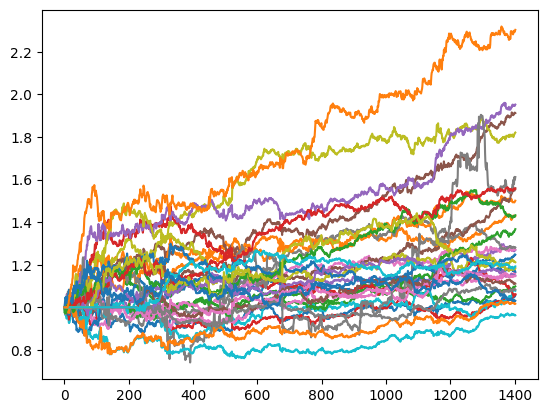

In [113]:
single_factor_test(df, [i for i in df.columns if i.startswith('alpha')], long_quantile=0.5, short_quantile=0.5, commission=0.0)

In [117]:

def trial(df, x_cols, y_col_name, param, n_round, begin, train_end, predict_end):
    # df = pl.read_parquet("../data/1d_262_alpha_new.parquet")
    # df=df
    # x_cols=['^alpha.*$']
    # y_col='returns'
    # param={'objective': 'reg:squarederror'}
    # n_round=1000
    # begin=pl.date(2021, 1, 1)
    # train_delta=pl.duration(days=365)
    # predict_delta=pl.duration(days=30)

    ind_col = pl.col("open_time")
    x_cols = [pl.col(i) for i in x_cols]
    y_col = pl.col(y_col_name)

    data = df.select(ind_col, pl.col("symbol"), *x_cols, y_col.shift(-1).rank().over("symbol").alias(y_col_name))

    train_data = data.filter((ind_col >= begin) & (ind_col < train_end))
    train_data = train_data.filter(y_col.is_not_null())
    test_data = data.filter((ind_col >= train_end) & (ind_col < predict_end))

    train_x = train_data.select(*x_cols)
    columns = sorted(train_x.columns)
    # sort columns by name
    train_x = train_x[columns].to_numpy()
    train_y = train_data.select(y_col).to_numpy()

    x_limits = np.nanquantile(train_x, [0.01, 0.99], axis=0)
    train_x = np.clip(train_x, x_limits[0], x_limits[1])
    y_limits = np.nanquantile(train_y, [0.01, 0.99])
    train_y = np.clip(train_y, y_limits[0], y_limits[1])

    test_x = test_data[columns].to_numpy()
    test_y = test_data.select(y_col).to_numpy()
    test_x = np.clip(test_x, x_limits[0], x_limits[1])
    test_y = np.clip(test_y, y_limits[0], y_limits[1])

    # train using linear regression
    from sklearn.linear_model import LinearRegression
    model = LinearRegression()
    model.fit(np.nan_to_num(train_x, 0), np.nan_to_num(train_y, 0))
    prediction = model.predict(np.nan_to_num(test_x)).squeeze()

    # train_mat = xgb.DMatrix(train_x, label=train_y)
    # bst = xgb.train(param, train_mat, num_boost_round=n_round)
    # test_mat = xgb.DMatrix(test_x, label=None)
    # prediction = bst.predict(test_mat)

    return pl.DataFrame({"open_time": test_data["open_time"], "symbol": test_data["symbol"], "prediction": prediction})



In [118]:
df = pl.read_parquet("../data/1d_262_alpha_new.parquet")
time_steps = df["open_time"].unique()

train_steps = 300
predict_steps = 30
x_cols=['^alpha.*$']
y_col='returns'
param={'objective': 'reg:squarederror', 'max_depth': 3}
n_round=100

preds = []
for begin in range(0, len(time_steps)-train_steps-1, predict_steps):
    preds.append(trial(df, x_cols, y_col, param, n_round, time_steps[begin], time_steps[begin+train_steps], time_steps[min(len(time_steps)-1, begin+train_steps+predict_steps)]))


/tmp/ipykernel_3086130/3907053490.py:18: RuntimeWarning: divide by zero encountered in divide
  short_holdings = - weight / short_holdings.sum(axis=1, keepdims=True) * short_holdings
/tmp/ipykernel_3086130/3907053490.py:18: RuntimeWarning: invalid value encountered in multiply
  short_holdings = - weight / short_holdings.sum(axis=1, keepdims=True) * short_holdings
/tmp/ipykernel_3086130/3907053490.py:24: RuntimeWarning: divide by zero encountered in divide
  long_holdings = weight / long_holdings.sum(axis=1, keepdims=True) * long_holdings
/tmp/ipykernel_3086130/3907053490.py:24: RuntimeWarning: invalid value encountered in multiply
  long_holdings = weight / long_holdings.sum(axis=1, keepdims=True) * long_holdings


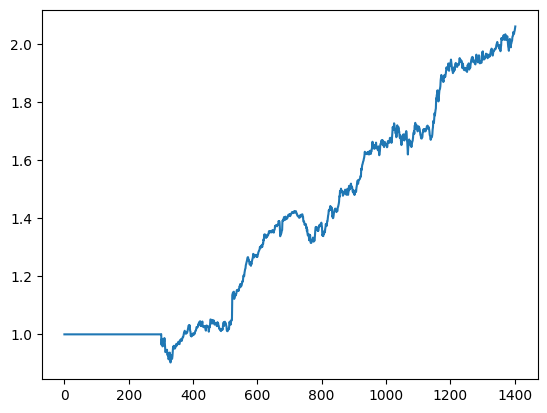

In [127]:
alpha = pl.concat(preds)
dfalpha = df.join(alpha, on=["open_time", "symbol"], how="left")
dfalpha = dfalpha.with_columns(future_returns=pl.col("returns").shift(-1).over("symbol"))
# dfalpha.filter(pl.col("prediction").is_not_null())
single_factor_test(dfalpha, ["prediction"], long_quantile=0.7, short_quantile=0.3, commission=0.0)
